In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib import temp_lib
from scipy import fftpack
import numpy.linalg as npl



In [2]:
help(temp_lib)

Help on class temp_lib in module lib:

class temp_lib(builtins.object)
 |  temp_lib(image)
 |  
 |  Class used to perform spectral analysis
 |  
 |  Attributes:
 |  
 |  image : numpy ndarray  of shape (Nx, Ny)
 |  s :  integer - sampling ratio
 |  x, y : numpy ndarray  with respective shapes Nx et Ny
 |  fs : sampling frequency
 |  ds_band : numpy ndarray of shape Nx  - > extracted band from the image
 |  
 |  Methods defined here:
 |  
 |  __init__(self, image)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cross_spectro(self, other, vmax=None)
 |      Calculates either the product or the difference between the computed spectrograms of two ds_bands (signals)
 |      Assuming that the spectrograms are computed
 |  
 |  cwt(self, w=None, multiplier=None, plot=True)
 |      Todo
 |  
 |  decrease_resolution(self, n)
 |      Decreases the resolution using numpy.convolve and updates ds_band
 |      Reset by calling extract_band
 |  
 |  extract_band(self, 

In [2]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())

/home/larousse/Bureau/INSA/CESBIO/lib.py:89: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(self._ds_band)*10)
/home/larousse/Bureau/INSA/CESBIO/lib.py:91: RuntimeWarning: divide by zero encountered in log
  plt.plot(self._x, np.log(other._ds_band)*10)
/home/larousse/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/larousse/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


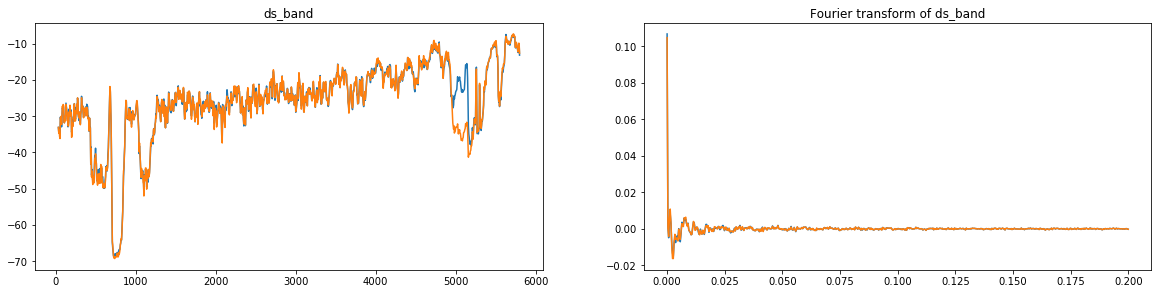

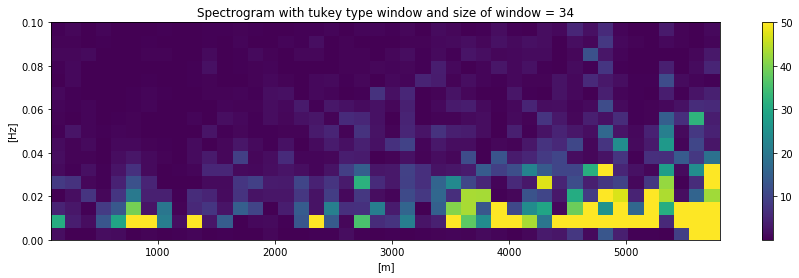

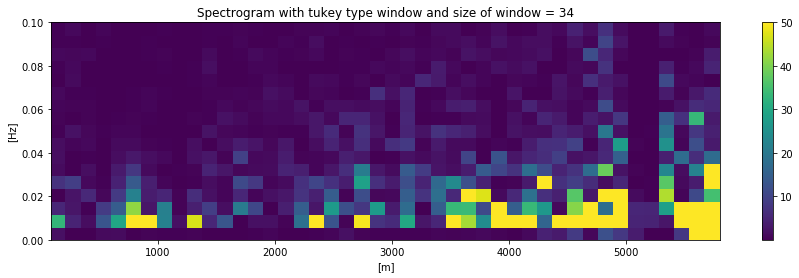

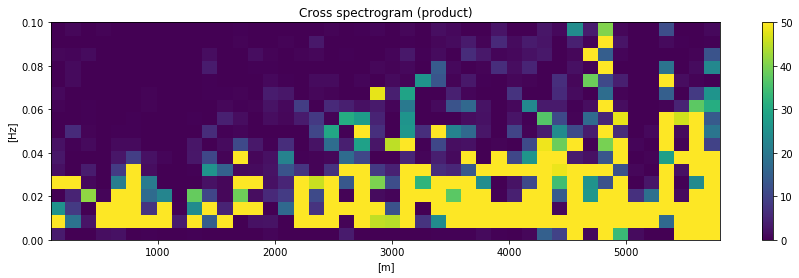

1000


In [18]:
element1 = temp_lib(ds_band1)
element3 = temp_lib(ds_band3)


element1.plot_TF(element3)

m = 1000 #signal multiplication

#element1.decrease_resolution(20)
#element1.plot_TF()
element1.extract_band()
element1._nwin = 35
element3._nwin = 35
element1.spectrogram('tukey', multiplier = m)
element3.spectrogram('tukey', multiplier = m)
element1.cross_spectro(element3)
print(element1._multiplier)

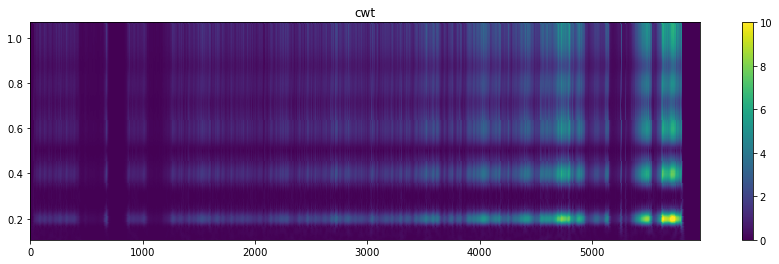

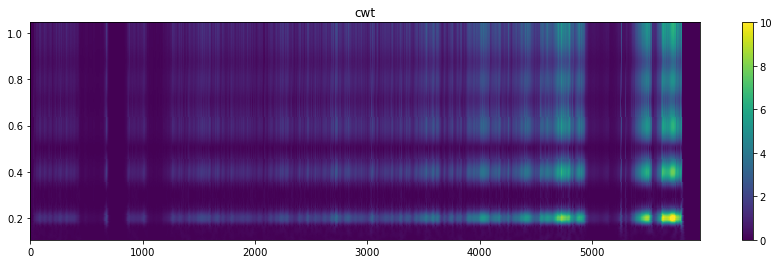

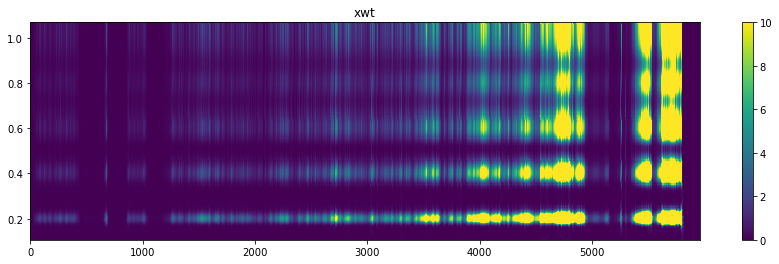

In [5]:
m = 10
w = 10
element1.cwt(w = 10, multiplier = m)
element3.cwt(w = 10, multiplier = m)
element1.xwt(element3)

In [11]:
from how2spectro_Morlet2 import morlet2
from how2spectro_Morlet2 import cwt
#psd = power spectral density welch (signal library)

5965


<ipython-input-12-b00997807e4d>:34: RuntimeWarning: invalid value encountered in multiply
  cwtm1 = cwt(ds_target1bis, morlet2, widths, w = w)*100
<ipython-input-12-b00997807e4d>:35: RuntimeWarning: invalid value encountered in multiply
  cwtm3 = cwt(ds_target3bis, morlet2, widths, w = w)*100
<ipython-input-12-b00997807e4d>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


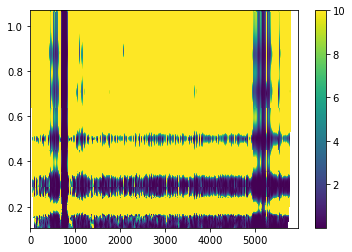

In [12]:
ds_target1 = np.zeros(len(ds_band1[1000,:]))
ds_target3 = np.zeros(len(ds_band3[1000,:]))

Ny,Nx = np.shape(ds_band3)
x = np.linspace(0,Nx*5,Nx)
y = np.linspace(0,Ny*5,Ny)

ls = 712
le = 728
for i in range(ls,le):
    ds_target1 = ds_band1[i,:] + ds_target1
    ds_target3 = ds_band3[i,:] + ds_target3
ds_target1 = ds_target1/(le-ls)
ds_target3 = ds_target3/(le-ls)
N = len(ds_target1)
length = N*5 # 1 pixel correspond to 5 metres (?)
fs = N/length

Tobs = length
print(Tobs)
d1x = np.arange(N)/float(fs)
x = np.linspace(0,length,N)
xf = np.linspace(0,length*fs/2,N//2)/length
fy = fftpack.fft(ds_target1)[:N//2]/N
fy2 = fftpack.fft(ds_target3)[:N//2]/N

d1fmax = np.max(abs(fy))
d2fmax = np.max(abs(fy2))

w = 10
d1f = np.linspace(d1fmax, d1fmax*10, 2000 )
widths = w*fs / (2*d1f *np.pi)

cwtm1 = cwt(ds_target1bis, morlet2, widths, w = w)*100
cwtm3 = cwt(ds_target3bis, morlet2, widths, w = w)*100

fig3 = plt.figure(3)
plt.pcolormesh(d1x,d1f,np.abs(cwtm1*np.conj(cwtm3)),cmap = 'viridis',vmax = 10)
plt.colorbar()
fig3.show()



In [9]:
print(np.linspace(0,Tobs, N))
print((np.arange(N)/float(fs)))

[0.00000000e+00 5.00419463e+00 1.00083893e+01 ... 5.95499161e+03
 5.95999581e+03 5.96500000e+03]
[0.000e+00 5.000e+00 1.000e+01 ... 5.950e+03 5.955e+03 5.960e+03]


In [35]:
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

ds_normal = gdal.Open(Tifpath1)

ds_band1bis = ds_target1/np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band3bis = ds_target3/np.array(ds_normal.GetRasterBand(1).ReadAsArray())

ds_target1bis = np.zeros(len(ds_band3bis[1000,:]))
ds_target3bis = np.zeros(len(ds_band3bis[1000,:]))

ls1 = 712
le1 = 728
for i in range(ls,le):
    ds_target1bis = ds_band1bis[i,:] + ds_target1bis
    ds_target3bis = ds_band3bis[i,:] + ds_target3bis

ds_target1bis = ds_target1bis/(le1-ls1)
ds_target3bis = ds_target3bis/(le1-ls1)

<ipython-input-35-fe68f8b7c24e>:5: RuntimeWarning: divide by zero encountered in true_divide
  ds_band1bis = ds_target1/np.array(ds_normal.GetRasterBand(1).ReadAsArray())
<ipython-input-35-fe68f8b7c24e>:5: RuntimeWarning: invalid value encountered in true_divide
  ds_band1bis = ds_target1/np.array(ds_normal.GetRasterBand(1).ReadAsArray())
<ipython-input-35-fe68f8b7c24e>:6: RuntimeWarning: divide by zero encountered in true_divide
  ds_band3bis = ds_target3/np.array(ds_normal.GetRasterBand(1).ReadAsArray())
<ipython-input-35-fe68f8b7c24e>:6: RuntimeWarning: invalid value encountered in true_divide
  ds_band3bis = ds_target3/np.array(ds_normal.GetRasterBand(1).ReadAsArray())


In [34]:
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

print(len(ds_band1bis))

normal1 = temp_lib(ds_band1bis)
normal3 = temp_lib(ds_band3bis)

print(ds_band1bis)
m = 100

normal1.cwt()



1866
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


ValueError: arange: cannot compute length